Your task is to use Python (you can use only packages numpy and/or Pandas, together with 
plotting package like matplotlib. That says, you are NOT allowed to use any packages that can 
directly apply k-means.) to implement the well-known clustering algorithm, K-means, based on a 
synthetic dataset cdata.csv. This dataset contains two data columns, “X” and “Y”, and one “cluster” 
column (1, 2, 3, and 4). In implementing K-means, you need to use “X” and “Y” as features for 
clustering while the “cluster” column is for your validation. Note that it is not necessary to 
perfectly clustering all of the data points into clusters. Also note that the “cluster” column cannot 
be used in clustering. 

(1) Randomly select data points as the initialized centroids. By default, please set K=4. Report and 
plot the process until convergence. The centroids also need to be plotted. An example is 
shown below. Note that it may not have 3 rounds (it can be 4 or 5 rounds, depend on initialized 
centroids).
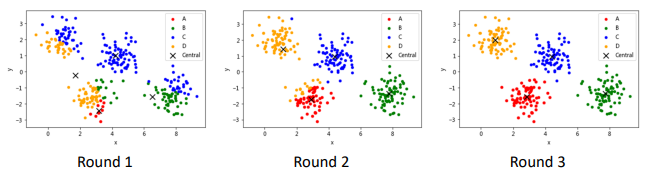

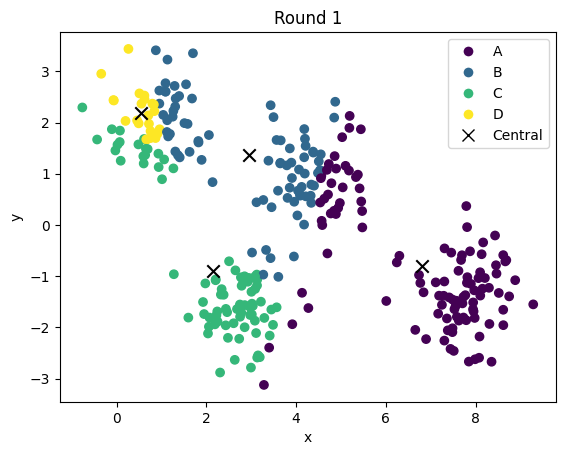

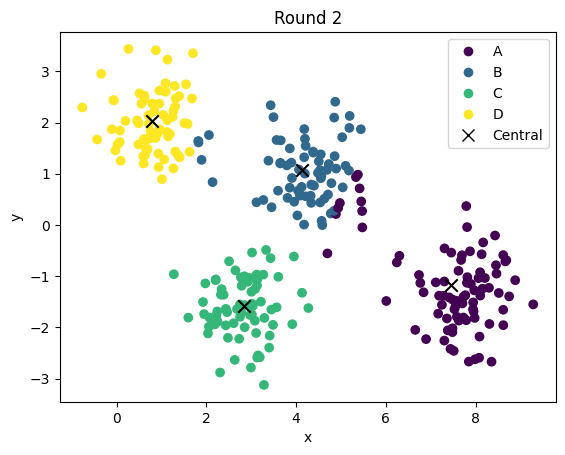

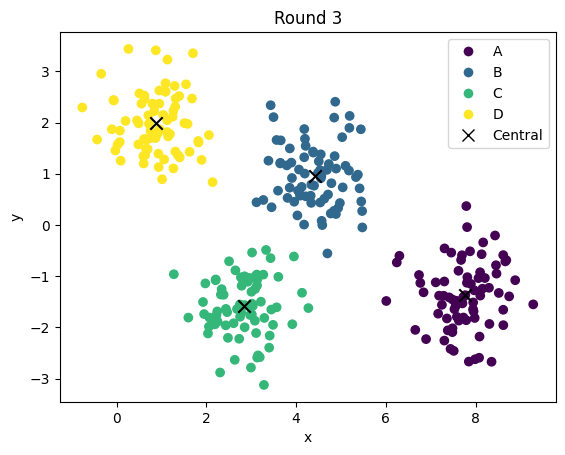

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#read csv file
file = pd.read_csv('cdata.csv')
data = file[['x','y']].values

#plot the process(use the output from kmeans function)
def kmeans_plot(data, labels, centroids, round):
    #plot data points with colors by labels
    scatter = plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o')

    #plot centrals
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x',label='Central', s=80)

    # legend of cluster
    cluster_labels = [chr(65 + i) for i in range(K)]  # A, B, C, ... cluster
    handles = []
    for i in range(K):
        handles.append(plt.Line2D([0], [0], marker='o', color='w', label=f'{cluster_labels[i]}',
                                  markerfacecolor=scatter.cmap(scatter.norm(i)), markersize=8))
    # legend of Central
    handles.append(plt.Line2D([0], [0], marker='x', color='black', label='Central', markersize=8, linestyle='None'))
    plt.legend(handles=handles)

    # Set titles and labels
    plt.title(f'Round {round}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

# K-means algo.
def kmeans(data, K, plotValid=True):
    max_iterations = K*50 #avoid the non-stop cases
    counter = 0 #for the round count
    # randomly initialize centroids
    centroids = data[np.random.choice(data.shape[0], K, replace=False)] #replace=False: ensure unique
    for round in range(max_iterations):
        counter += 1
        #Euclidean distance between each data point and each centroid
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        #the data(by index) is assigned to which cluster(labels: 1D array)
        labels = np.argmin(distances, axis=1)

        #update centroids
        new_centroids = np.array([data[labels == k].mean(axis=0) for k in range(K)])


        #check for convergence
        if np.all(new_centroids == centroids):
            counter -= 1
            break
        centroids = new_centroids
        #the following subproblems might not need to plot
        if plotValid:
            kmeans_plot(data,labels,centroids,round+1)
    # if plotValid:
    #     print(f'round: {counter}')
    return labels, centroids

# K = 4
K = 4
labels, centroids = kmeans(data, K)

(2) Re-execute your K-means clustering algorithm by changing K from 2 to 50 (from 2 to 10 is also 
okay). Plot the K value (x-axis) vs. the value of Sum of Squared Error (SSE) (y-axis) as below. 
Note that it is reasonable and acceptable if the curve is 凹凸不平.

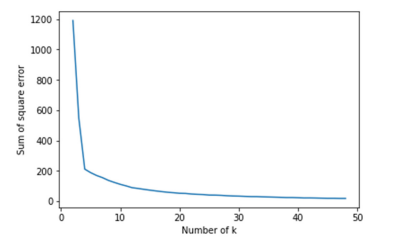

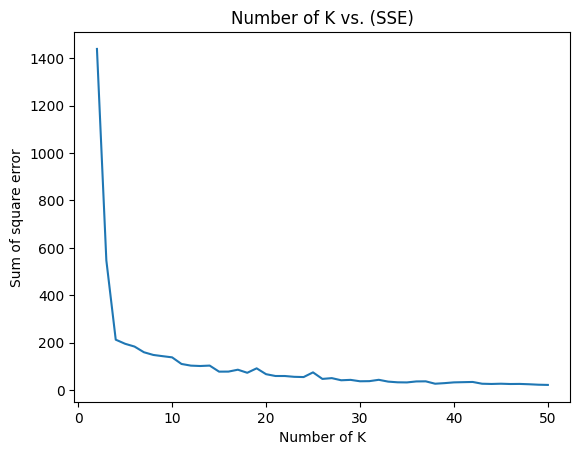

In [146]:
# compute 
def compute_sse(data, labels, centroids):
    sse = 0
    #iterate the centroids then do the def of SSE
    for k in range(len(centroids)):
        sse += np.sum((data[labels == k] - centroids[k])**2)
    return sse

K_range = range(2,51) #x-axis in the plot
SSE_values = [] #y-axis

#calculate SSE values for each K
for K in K_range:
    labels, centroids = kmeans(data, K, plotValid=False) # Disable plotting
    sse = compute_sse(data, labels, centroids)
    SSE_values.append(sse)

#plot the required output
# Plot K vs SSE
plt.plot(K_range, SSE_values)
plt.title('Number of K vs. (SSE)')
plt.xlabel('Number of K')
plt.ylabel('Sum of square error')
plt.show()



(3) Try 10 times of randomly initialized centroids, and plot their SSE values (y-axis) such as 
below.

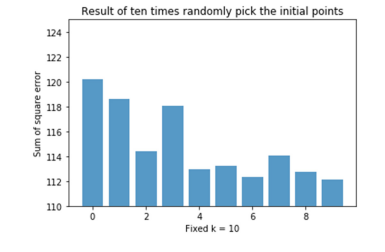

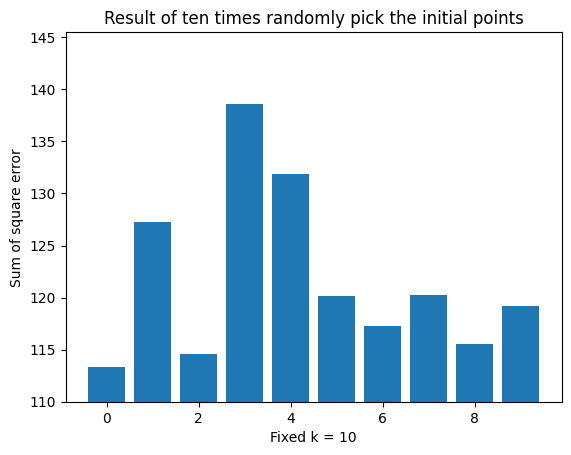

In [162]:
K = 10
test_number = 10
SSE_values = []
# 10 times of Kmeans clustering with random init
for i in range(test_number):
    labels, centroids = kmeans(data, K, plotValid=False) 
    sse = compute_sse(data, labels, centroids)
    SSE_values.append(sse)

# Plot bar chart of SSE values for each time
plt.bar(range(0, test_number), SSE_values)
plt.title('Result of ten times randomly pick the initial points')
plt.xlabel(f'Fixed k = {test_number}')
plt.ylabel('Sum of square error')
plt.ylim(bottom=110)
plt.show()